# Python Programming Exercises

### Exercise 1
Write a program to solve a classic puzzle: There are 35 heads and 94 legs among the chickens and rabbits in a farm. How many rabbits and how many chickens do we have? Hint: Use for loop to iterate all possible solutions

In [2]:
# Number of chickens: c
# Number of rabbits: r
# c + r = 35
# 2*c + 4*r = 94

for r in range(36):  # try from 0 rabbit to 35 rabbits
    c = 35 - r  # The number of chickens
    if 2*c + 4*r == 94:
        print(f"There are {c} chickens and {r} rabbits.")
        break  # stop after a solution is found

There are 23 chickens and 12 rabbits.


### Exercise 2
In this exercise, the task is to read a set of temperature data (the monthly high temperatures at Heathrow Airport from Jan 1948 through Dec 2016) from a file and then find some basic information: the highest and lowest temperatures, the mean (average) temperature, and the median temperature (the temperature in the middle if all the temperatures are sorted). The temperature data is in the file “data/Heathrow.txt”.

In [8]:
def mean(data):
    '''A funtion to calculate and return the mean value of a list'''
    return sum(data)/len(data)

def median(data):
    '''A function to calculate and return the median value of a list'''
    sdata = sorted(data)
    n = len(sdata)
    if n%2 == 0:  # even number of items in the list
        med = (sdata[n//2 - 1] + sdata[n//2]) / 2
    else:  # odd number of items in the list
        med = sdata[n//2]
    return med

with open('data/Heathrow.txt', 'r') as f:
    raw_data = f.read()
    data = raw_data.split('\n')
    temperatures = [float(i) for i in data if i != ''] 
    temperatures.sort()
    print(f'''Minimum: {temperatures[0]}, 
            maximum: {temperatures[-1]}, 
            mean: {mean(temperatures)},
            median: {median(temperatures)}''')
    
    

Minimum: 0.8, 
            maximum: 28.2, 
            mean: 14.848309178743966,
            median: 14.7


### Exercise 3
For the problem in Exercise 1, use NumPy by applying linear algebra to find the solution.

In [10]:
import numpy as np

# Equations
# c + r = 35
# 2c + 4r = 94

coeffs = np.array([[1, 1], [2, 4]])
depvars = np.array([35, 94])
c, r = np.linalg.solve(coeffs, depvars)

print(f"There are {c:.0f} chickens and {r:.0f} rabbits.")

There are 23 chickens and 12 rabbits.


### Exercise 4
Solve Exercise 2 by using NumPy.

In [11]:
import numpy as np
temperatures = np.loadtxt("data/Heathrow.txt")

print(f'''Minimum: {np.min(temperatures)},
maximum: {np.max(temperatures)},
mean: {np.mean(temperatures)},
median: {np.median(temperatures)}''')

Minimum: 0.8,
maximum: 28.2,
mean: 14.848309178743962,
median: 14.7


### Exercise 5
Solve Exercise 2 by using Pandas. In addition, find out the hottest month between 1948 and 2016. Plot the mean temperature for each month.

             Temp
min      0.800000
max     28.200000
mean    14.848309
median  14.700000
Hottest year and month: 2006-07


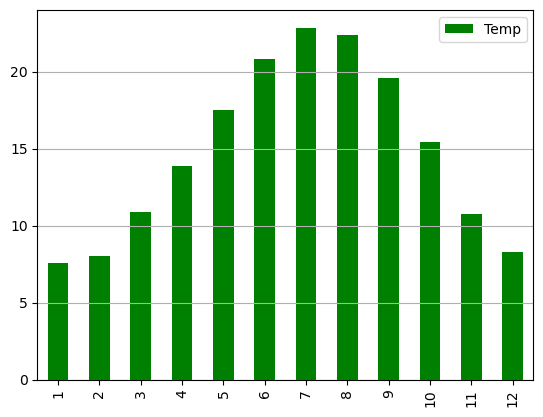

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# read data into a Pandas DataFrame object 
df = pd.read_csv('data/Heathrow.txt', header=None, names=['Temp'])

# Calculate and print the min, max, mean and median of the data
print(df.aggregate(['min', 'max', 'mean', 'median']))

# Set the index to a range of date, increment by month
df.index = pd.period_range(start=1948, periods=len(df), freq='M')

# Sort the data by temperatures in ascending order
df.sort_values(by=['Temp'], inplace=True)
print(f"Hottest year and month: {df.index[-1]}")  # Print the date and highest temperature

# Export Dataframe to csv file
df.to_csv('temperatures_date.csv', index_label='Date')

# Plot average temperature for each month from 1948 to 2016
groups = df.groupby(df.index.month)
groups.mean().plot.bar(color='green')
plt.grid(axis='y')
plt.show()



### Exercise 6
Plot two cycles of a sinusoidal voltage waveform with an amplitude of 2 and frequency of 50Hz and a DC offset of 5V. Calculate the average voltage and root mean square (RMS) voltage.

### Exercise 7
Below are the data points of a sawtooth current:\
    f2 = 50\
    t2 = np.linspace(0, 0.04, 41)\
    i = 2 * (f2 * t2 - np.floor(0.5 + f2 * t2)) + 1

Plot the current and the power if the voltage is as shown in Exercise 6.

### Exercise 8
A voltage waveform has been downloaded from an oscilloscope by using PyVISA. The waveform is stored in the CSV file format and the file can be accessed as 'data/waveform_data.csv'. Load and plot the waveform from the CSV file.